<a href="https://colab.research.google.com/github/AntoninCamus/AI_ChatBot/blob/master/text_classification_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#my first notebook

In [3]:
#mout my drive, where i put all the data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [31]:
#dataset from https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences
#includes our set and 2 others (imdb, yealp)
#Twitter dataset: http://bit.do/twitterdataset
#reach my drive and check if it is there: 
!ls "/content/gdrive/My Drive/Colab Notebooks/datasets/sentiment labelled sentences/sentiment labelled sentences/"

 amazon_cells_labelled.txt  'Sentiment Analysis Dataset.csv'
 imdb_labelled.txt	     yelp_labelled.txt
 readme.txt


TwitterCNN.h5  TwitterCNN.json


In [0]:
#I will now try to follow this tutorial:
#https://medium.com/saarthi-ai/sentence-classification-using-convolutional-neural-networks-ddad72c7048c

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer                    
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers

#read the data in a pandas dataframe
path = "/content/gdrive/My Drive/Colab Notebooks/datasets/sentiment labelled sentences/sentiment labelled sentences/"
filepath_dict = {'yelp': 'yelp_labelled.txt' ,'amazon': 'amazon_cells_labelled.txt','imdb': 'imdb_labelled.txt'}
df_list = []
for source, filepath in filepath_dict.items():
  filepath = path + filepath
  df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
  #Add another column filled with the source name
  df['source'] = source 
  df_list.append(df)
df = pd.concat(df_list)

twitterPath = path + 'Sentiment Analysis Dataset.csv'  
dt = pd.read_csv(twitterPath, names=['ItemID','Sentiment','SentimentSource','SentimentText'])# dtype={})


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#import datasets
c=2

# c=0 load Amazone + Imdb + Yelp datasets
# c=1 load Amazone  dataset
# c=2 load Twitter dataset

if c== 0:
  df = df
  sentences = df['sentence'].values
  y = df['label'].values 

if c==1:
  df = df[df['source'] == 'amazon']  
  sentences = df['sentence'].values
  y = df['label'].values 

if c==2:
  sentences = dt['SentimentText'].values #use the twitter dataset
  sentences = sentences[1:]  # DON'T USE the sentences[0] 
  y = dt['Sentiment'].values #use the twitter dataset
  y=y[1:]    #DON'T USE the y[0] data because it is a string  

In [0]:
import re
#Pre process

#Remove URLs
temp =[]
for s in sentences:
  temp.append(re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '',s))
sentences=temp

#Remove @Names  
temp =[]
for s in sentences:
  temp.append(re.sub('@[s]?(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '',s))
sentences=temp

# Convert to lower case  
temp =[]
for s in sentences:
  temp.append(s.lower())
sentences=temp  

# Remove punctuation
#punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
#temp =[]
#for s in sentences:
#  for x in s: 
#    if x in punctuations: 
#      string = s.replace(x, "")
#  temp.append(string)
#sentences=temp  

# Print first 100 sentences
#for i in range (1, 100):
#  print(sentences[i])

In [9]:
#split datasets into training and testing
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

#turn words into sequence of ints
#only the most common num_words-1 words will be kept.
tokenizer = Tokenizer(num_words=5000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~') 

#learn word_counts, word_docs, word_index (which we will use), document_count:
tokenizer.fit_on_texts(sentences_train) 

print('before vectorization:', sentences_train[0])
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

print('after vectorization:', X_train[0])
# Adding 1 because of  reserved 0 index
vocab_size = len(tokenizer.word_index) + 1                          

#maxlen = 30 for Amazone+...
#maxlen = ? for Twitter

maxlen = 100 #100 
#pad them into the same lengths
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print('after padding:', X_train[0])



before vectorization: one of the kids raised his arm. when i came bye he asked for the meaning of barbell - sweet 
after vectorization: [53, 12, 3, 449, 187, 1605, 83, 1, 441, 593, 108, 1046, 11, 3, 2754, 12, 389]
after padding: [  53   12    3  449  187 1605   83    1  441  593  108 1046   11    3
 2754   12  389    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [0]:
#Graph
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [11]:
#Model 1 Twitter(82%)
from keras import regularizers
embedding_dim = 50 #100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen)) # embedding_dim = 50
model.add(layers.Dropout(0.3)) #model.add(layers.Dropout(0.3))
model.add(layers.Conv1D(128, 5, activation='relu')) #layers.Conv1D(128, 5, activation='relu'))
model.add(layers.Conv1D(256, 10, activation='relu')) 
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.Dropout(0.3))
#model.add(layers.BatchNormalization())  #model.add(layers.BatchNormalization())
model.add(layers.GlobalMaxPooling1D())  #layers.GlobalMaxPooling1D()
model.add(layers.Dense(256, activation='relu'))  #layers.Dense(10, activation='relu')
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #layers.Dense(1, activation='sigmoid')
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#Model 2 Amazone
from keras import regularizers
embedding_dim = 100 #100

model_2 = Sequential()
model_2.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen)) # embedding_dim = 50
model_2.add(layers.Conv1D(128, 5, activation='relu')) #layers.Conv1D(128, 5, activation='relu'))
model_2.add(layers.GlobalMaxPooling1D())  #layers.GlobalMaxPooling1D()
model_2.add(layers.Dense(10, activation='relu'))  #layers.Dense(10, activation='relu')
model_2.add(layers.Dense(1, activation='sigmoid')) #layers.Dense(1, activation='sigmoid')
model_2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
#Model 3
from keras import regularizers
embedding_dim = 40 #100

model_3 = Sequential()
model_3.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen)) # embedding_dim = 50
model_3.add(layers.Dropout(0.3)) #model.add(layers.Dropout(0.3))
model_3.add(layers.Conv1D(128, 15, activation='relu')) #layers.Conv1D(128, 5, activation='relu'))
model_3.add(layers.Conv1D(256, 10, activation='relu')) 
model_3.add(layers.Conv1D(128, 5, activation='relu'))
model_3.add(layers.Dropout(0.3))
#model.add(layers.BatchNormalization())  #model.add(layers.BatchNormalization())
model_3.add(layers.GlobalMaxPooling1D())  #layers.GlobalMaxPooling1D()
model_3.add(layers.Dense(256, activation='relu'))  #layers.Dense(10, activation='relu')
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid')) #layers.Dense(1, activation='sigmoid')
model_3.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

Train on 1183960 samples, validate on 394654 samples
Epoch 1/10
1183960/1183960 [==============================] - 218s 184us/step - loss: 0.4490 - acc: 0.7877 - val_loss: 0.4172 - val_acc: 0.8107
Epoch 2/10
1183960/1183960 [==============================] - 216s 182us/step - loss: 0.4120 - acc: 0.8115 - val_loss: 0.4049 - val_acc: 0.8162
Epoch 3/10
1183960/1183960 [==============================] - 216s 182us/step - loss: 0.4011 - acc: 0.8170 - val_loss: 0.4066 - val_acc: 0.8187
Epoch 4/10
1183960/1183960 [==============================] - 216s 182us/step - loss: 0.3934 - acc: 0.8214 - val_loss: 0.3972 - val_acc: 0.8205
Epoch 5/10
1183960/1183960 [==============================] - 216s 182us/step - loss: 0.3874 - acc: 0.8247 - val_loss: 0.3964 - val_acc: 0.8207
Epoch 6/10
1183960/1183960 [==============================] - 216s 182us/step - loss: 0.3821 - acc: 0.8274 - val_loss: 0.3926 - val_acc: 0.8224
Epoch 7/10
1183960/1183960 [==============================] - 215s 182us/step - los

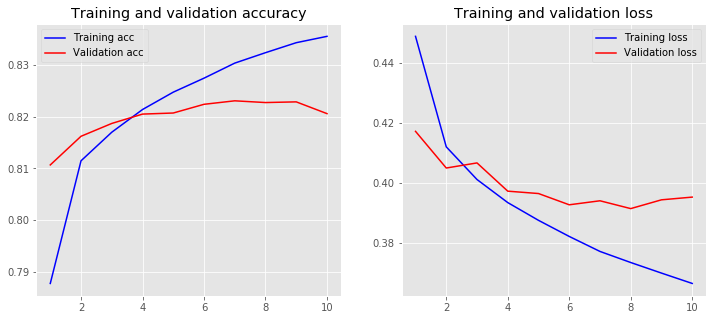

In [13]:
#train
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=1000)
plot_history(history) 

In [0]:
model.save('/content/gdrive/My Drive/Colab Notebooks/Models/CNN_for_NLP.h5')

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')
from IPython.display import Image
Image(filename='model.png')



In [13]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/Models/CNN_for_NLP.h5')


Train on 2061 samples, validate on 687 samples
Epoch 1/10
2061/2061 [==============================] - 2s 782us/step - loss: 0.6312 - acc: 0.6371 - val_loss: 0.4456 - val_acc: 0.8064
Epoch 2/10
2061/2061 [==============================] - 1s 479us/step - loss: 0.2916 - acc: 0.8894 - val_loss: 0.4177 - val_acc: 0.8253
Epoch 3/10
2061/2061 [==============================] - 1s 477us/step - loss: 0.0858 - acc: 0.9791 - val_loss: 0.4514 - val_acc: 0.8239
Epoch 4/10
2061/2061 [==============================] - 1s 484us/step - loss: 0.0234 - acc: 0.9961 - val_loss: 0.5178 - val_acc: 0.8311
Epoch 5/10
2061/2061 [==============================] - 1s 474us/step - loss: 0.0069 - acc: 0.9990 - val_loss: 0.5708 - val_acc: 0.8239
Epoch 6/10
2061/2061 [==============================] - 1s 471us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6074 - val_acc: 0.8282
Epoch 7/10
2061/2061 [==============================] - 1s 457us/step - loss: 9.1127e-04 - acc: 1.0000 - val_loss: 0.6351 - val_acc: 0.82

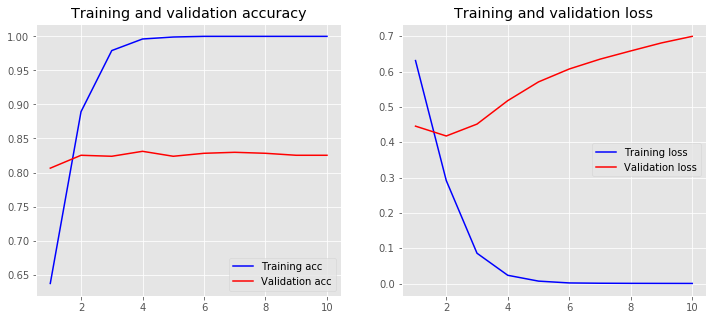

In [39]:
history_2 = model_2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=10)
plot_history(history_2)  

Train on 1183960 samples, validate on 394654 samples
Epoch 1/10
1183960/1183960 [==============================] - 73s 61us/step - loss: 0.4513 - acc: 0.7866 - val_loss: 0.4290 - val_acc: 0.8072
Epoch 2/10
1183960/1183960 [==============================] - 72s 60us/step - loss: 0.4146 - acc: 0.8099 - val_loss: 0.4115 - val_acc: 0.8124
Epoch 3/10
1183960/1183960 [==============================] - 72s 61us/step - loss: 0.4042 - acc: 0.8153 - val_loss: 0.4159 - val_acc: 0.8164
Epoch 4/10
1183960/1183960 [==============================] - 72s 61us/step - loss: 0.3972 - acc: 0.8193 - val_loss: 0.3989 - val_acc: 0.8187
Epoch 5/10
1183960/1183960 [==============================] - 72s 60us/step - loss: 0.3916 - acc: 0.8222 - val_loss: 0.4005 - val_acc: 0.8190
Epoch 6/10
1183960/1183960 [==============================] - 71s 60us/step - loss: 0.3865 - acc: 0.8249 - val_loss: 0.3983 - val_acc: 0.8199
Epoch 7/10
1183960/1183960 [==============================] - 72s 61us/step - loss: 0.3823 - ac

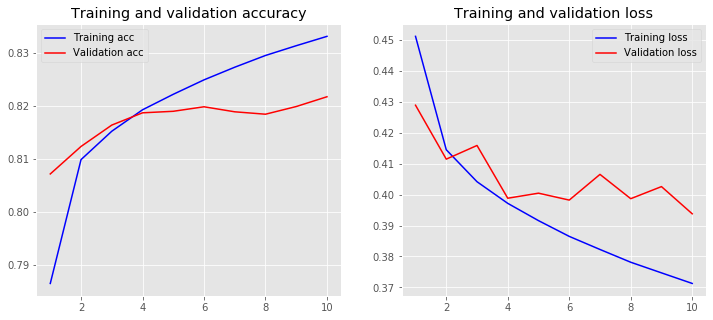

In [0]:
history_3 = model_3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=1000)
plot_history(history_3)  

In [0]:
def  StringProcessed(text, maxlen=100):   #maxlen = 100 #100
  input_test.append(text)
  #turn words into sequence of ints
  answer = tokenizer.texts_to_sequences(input_test)  
  #pad them into the same lengths
  answer = pad_sequences(answer, padding='post', maxlen=maxlen)
  return answer

In [0]:
#Chatbot v1: Positive or negative reaction.
text='Go'
while text != 'Esc':
  input_test = []
  text = input("Enter a text: ")
  answer = StringProcessed(text, maxlen=100)
  answer_feel=model.predict(answer)
  if answer_feel>0.5:
    print('I\'m happy to hear this.  (',answer_feel,')')
  else: 
    print('I\'m sad to hear this.  (',answer_feel,')')
  print()

In [30]:
#Chatbot v2: 
print('Are you happy with your products?')
input_test = []
text = input("Enter a text: ")
temp=StringProcessed(text)
R1= model.predict(temp)
if R1>0.5:
  print('Would you recommend the product to someone else? ')
  input_test = []
  text = input("Enter a text: ")
  temp=StringProcessed(text)
  R4= model.predict(temp)
  if R4>0.5:
    print('I am glad to heard that!')
  else:
    print('Please, fill out the questionnaire to help us improve: tips.pdf')
else:
  print('I\'m sorry to hear that, can I help you to solve the problem?')
  input_test = []
  text = input("Enter a text: ")
  temp=StringProcessed(text)
  R2= model.predict(temp)
  if R2>0.5:
    print('Would you like to contact a salesperson?')
    input_test = []
    text = input("Enter a text: ")
    temp=StringProcessed(text)
    R3= model.predict(temp)
    if R3>0.5:
      print('You have to contact this number: +44 339 8564 231')  
    else:
      print('For the refund complete the following form: Refund.pdf')  
  else:
    print('Would you like a refund ?')
    input_test = []
    text = input("Enter a text: ")
    temp=StringProcessed(text)
    R3= model.predict(temp)
    if R3>0.5:
      print('For the refund complete the following form: Refund.pdf')  
    else:
      print('Sorry I\'m only a bot, pleasa contact this number +44 339 8564 231 ')


Are you happy with your products?
Enter a text:  Yes, it does its job.
Would you recommend the product to someone else? 
Enter a text: Not really, I think it can be improved.
Please, fill out the questionnaire to help us improve: tips.pdf


In [44]:
#Load other models
!ls "/content/gdrive/My Drive/Pretrained/"

# load model
from keras.models import model_from_json
json_file = open('/content/gdrive/My Drive/Pretrained/TwitterCNN.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/gdrive/My Drive/Pretrained/TwitterCNN.h5")
loaded_model.compile(
    optimizer="adam", 
    loss="binary_crossentropy", 
    metrics=['accuracy']
    )

TwitterCNN.h5  TwitterCNN.json
